# UNSUPERVIZED MACHINE LEARNING

# CLUSTERING ALGORITHMS

# MODEL TRAINING and BUIDING-------

1.1 IMPORT DATA AND REQUIRED PACKAGES

In [2]:
# BASIC IMPORT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# MODELING
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('modified_data.csv')

In [4]:
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Age,Ttl_yrs_in_comp,TotalAmountSpend
0,2,2,58138.0,0,0,58,635,88,546,172,...,4,7,0,0,0,0,0,67,11,1617
1,2,2,46344.0,1,1,38,11,1,6,2,...,2,5,0,0,0,0,0,70,10,27
2,2,2,71613.0,0,0,26,426,49,127,111,...,10,4,0,0,0,0,0,59,10,776
3,2,2,26646.0,1,0,26,11,4,20,10,...,4,6,0,0,0,0,0,40,10,53
4,4,4,58293.0,1,0,94,173,43,118,46,...,6,5,0,0,0,0,0,43,10,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,2,61223.0,0,1,46,709,43,182,42,...,4,5,0,0,0,0,0,57,11,1341
2236,4,4,64014.0,2,1,56,406,0,30,0,...,5,7,0,0,0,1,0,78,10,444
2237,2,2,56981.0,0,0,91,908,48,217,32,...,13,6,0,1,0,0,0,43,10,1241
2238,3,3,69245.0,0,1,8,428,30,214,80,...,10,3,0,0,0,0,0,68,10,843


In [5]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaled= scaler.fit_transform(df.iloc[:,1:])
X_scaled

array([[-0.35014129,  0.23506136, -0.82521765, ...,  0.98534473,
         0.97182532,  1.67941681],
       [-0.35014129, -0.2360674 ,  1.03255877, ...,  1.23573295,
        -1.02899151, -0.96127545],
       [-0.35014129,  0.77334016, -0.82521765, ...,  0.3176428 ,
        -1.02899151,  0.28267329],
       ...,
       [-0.35014129,  0.18884329, -0.82521765, ..., -1.01776106,
        -1.02899151,  1.05495122],
       [ 0.53910643,  0.6787469 , -0.82521765, ...,  1.06880747,
        -1.02899151,  0.39394775],
       [ 1.42835415,  0.02458337,  1.03255877, ...,  1.23573295,
         0.97182532, -0.7204576 ]])

FINDING THE NUMVER OF CLUSTERS TO MAKE

c:\ml_projects\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\ml_projects\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\ml_projects\venv\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ml_projects\venv\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\ml_projects\venv\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
  

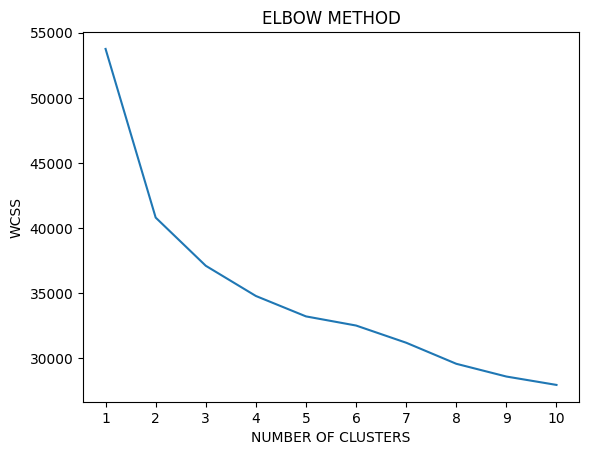

In [6]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
# plot the elbow method
plt.plot(range(1,11),wcss)
plt.title("ELBOW METHOD")
plt.xlabel("NUMBER OF CLUSTERS")
plt.ylabel("WCSS")
plt.xticks(range(1,11))
plt.show()


In [7]:
wcss

[53760.00000000001,
 40808.00494492698,
 37107.68822071759,
 34788.52455533891,
 33220.57979949489,
 32519.26397620004,
 31198.937169091067,
 29581.86246853564,
 28602.60329955491,
 27958.655762933828]

#lets do with k=2 

In [8]:
from sklearn.cluster import KMeans
clusters = KMeans(2,random_state=0)
clusters.fit(X_scaled)

KMeans(n_clusters=2, random_state=0)

In [9]:
kmeans = KMeans(n_clusters=2)
predict = kmeans.fit_predict(X_scaled)

In [10]:
predict

array([1, 0, 1, ..., 1, 1, 0], dtype=int32)

In [11]:
df['cluster_num']=kmeans.labels_

In [12]:
df.head(10)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Age,Ttl_yrs_in_comp,TotalAmountSpend,cluster_num
0,2,2,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,67,11,1617,1
1,2,2,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,70,10,27,0
2,2,2,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,59,10,776,1
3,2,2,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,40,10,53,0
4,4,4,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,43,10,422,0
5,3,3,62513.0,0,1,16,520,42,98,0,...,6,0,0,0,0,0,57,10,716,1
6,2,2,55635.0,0,1,34,235,65,164,50,...,6,0,0,0,0,0,53,11,590,1
7,4,4,33454.0,1,0,32,76,10,56,3,...,8,0,0,0,0,0,39,11,169,0
8,4,4,30351.0,1,0,19,14,0,24,3,...,9,0,0,0,0,0,50,11,46,0
9,4,4,5648.0,1,1,68,28,0,6,1,...,20,1,0,0,0,0,74,10,49,0


In [13]:
df[df['cluster_num']==1].head(10)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Age,Ttl_yrs_in_comp,TotalAmountSpend,cluster_num
0,2,2,58138.000000,0,0,58,635,88,546,172,...,7,0,0,0,0,0,67,11,1617,1
2,2,2,71613.000000,0,0,26,426,49,127,111,...,4,0,0,0,0,0,59,10,776,1
5,3,3,62513.000000,0,1,16,520,42,98,0,...,6,0,0,0,0,0,57,10,716,1
6,2,2,55635.000000,0,1,34,235,65,164,50,...,6,0,0,0,0,0,53,11,590,1
12,2,2,63033.000000,0,0,82,194,61,480,225,...,2,0,0,0,0,0,65,10,1102,1
15,4,4,82800.000000,0,0,23,1006,22,115,59,...,3,0,0,1,1,0,78,11,1315,1
18,3,3,76995.000000,0,1,91,1012,80,498,0,...,5,0,0,0,1,0,75,11,1782,1
21,2,2,2447.000000,1,0,42,1,1,1725,1,...,1,0,0,0,0,0,45,11,1730,1
27,2,2,52720.373656,1,0,19,5,1,3,3,...,1,0,0,0,0,0,38,11,637,1
29,4,4,84618.000000,0,0,96,684,100,801,21,...,2,0,0,1,0,0,59,10,1672,1


In [14]:
df[df['cluster_num']==0].head(10)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Age,Ttl_yrs_in_comp,TotalAmountSpend,cluster_num
1,2,2,46344.000000,1,1,38,11,1,6,2,...,5,0,0,0,0,0,70,10,27,0
3,2,2,26646.000000,1,0,26,11,4,20,10,...,6,0,0,0,0,0,40,10,53,0
4,4,4,58293.000000,1,0,94,173,43,118,46,...,5,0,0,0,0,0,43,10,422,0
7,4,4,33454.000000,1,0,32,76,10,56,3,...,8,0,0,0,0,0,39,11,169,0
8,4,4,30351.000000,1,0,19,14,0,24,3,...,9,0,0,0,0,0,50,11,46,0
9,4,4,5648.000000,1,1,68,28,0,6,1,...,20,1,0,0,0,0,74,10,49,0
10,2,2,52720.373656,1,0,11,5,5,6,0,...,7,0,0,0,0,0,41,10,19,0
11,1,1,7500.000000,0,0,59,6,16,11,11,...,8,0,0,0,0,0,48,11,61,0
13,3,3,59354.000000,1,1,53,233,2,53,3,...,6,0,0,0,0,0,72,10,310,0
14,2,2,17323.000000,0,0,38,3,14,17,6,...,8,0,0,0,0,0,37,11,46,0


In [15]:
df.groupby('cluster_num').agg(['mean']).reset_index()

,cluster_num,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Age,Ttl_yrs_in_comp,TotalAmountSpend
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.354815,2.354815,39156.742692,0.692593,0.557037,48.686667,101.650370,6.876296,37.389630,...,3.951852,6.380741,0.067407,0.034074,0.000000,0.005185,0.002222,54.059259,10.481481,185.260000
1,1,2.452809,2.452809,72119.600323,0.067416,0.429213,49.750562,610.773034,55.768539,363.474157,...,8.578652,3.702247,0.080899,0.135955,0.183146,0.153933,0.030337,56.915730,10.564045,1243.693258


# OBSERVATION                                                                                                                                   
HERE WE CAN SEE THAT CLUSTER NUMBER 1 CONTAIN VERY LESS NUMBER SPEND IN TOTAL AMOUNT SPEND COLUMN

# SILHOUETTE SCORE 

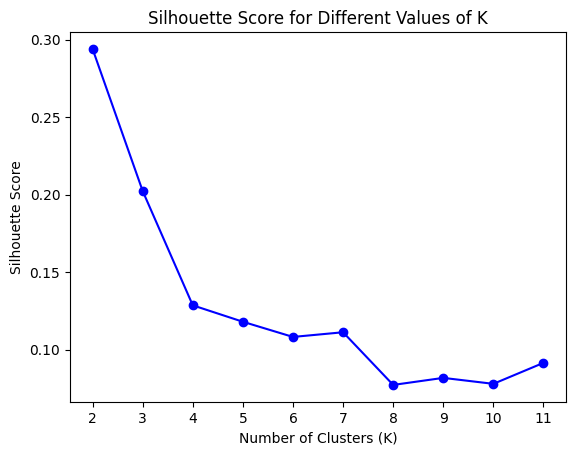

In [31]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []  # Renamed to avoid conflict

K_range = range(2, 12)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)  # Added random_state for reproducibility
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(K_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score for Different Values of K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(K_range)
plt.show()


# therefore we are getting maximum value for k=2 we will select k values as 2

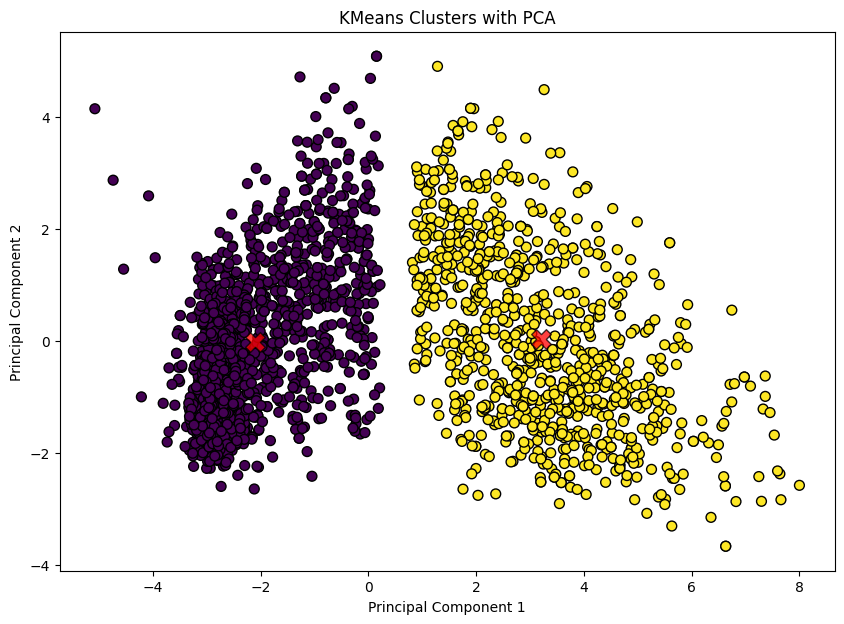

In [35]:

# Define the number of clusters
k = 2

# Create and fit the model
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Get cluster labels
labels = kmeans.labels_

# Use PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 7))

# Scatter plot of the two principal components
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)

# Mark the cluster centers
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, alpha=0.75, edgecolor='k')

# Add titles and labels
plt.title('KMeans Clusters with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show the plot
plt.show()

# OBSERVATION :
THEREFORE CLUSTER 1 REPRESENT HIGH INCOME AND HIGH SPENDING                                                                                    
AND CLUSTER 2 REPRESENT THE LOW INCOME AND LOW SPENDING

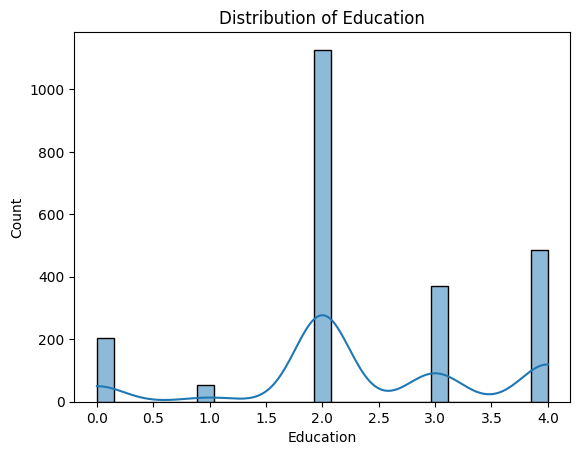

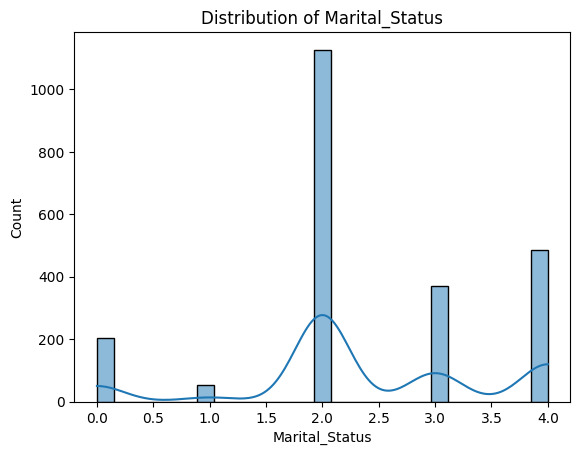

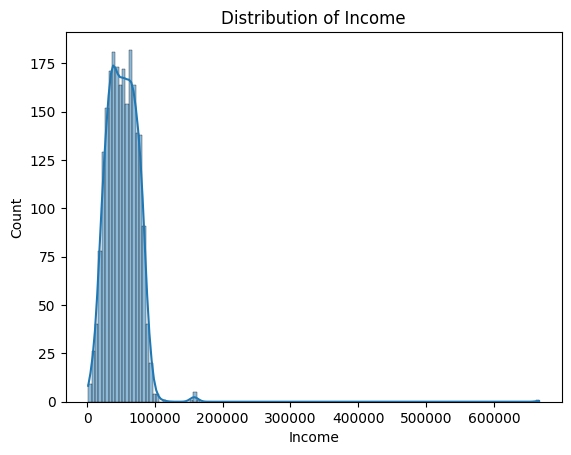

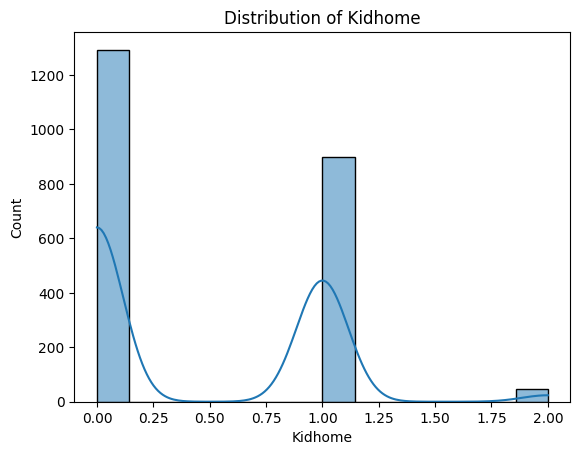

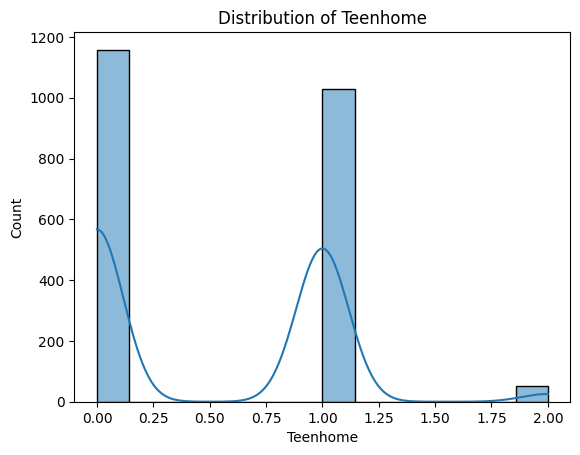

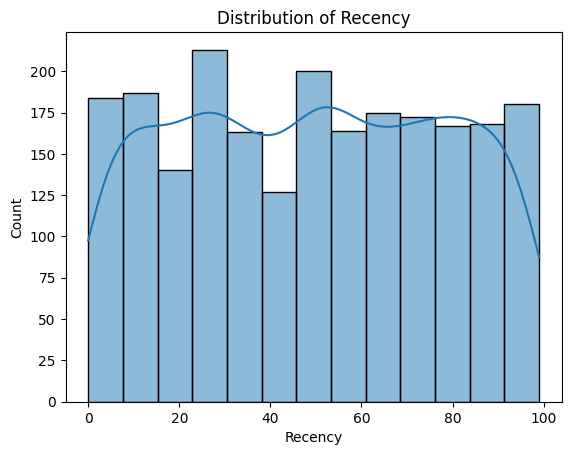

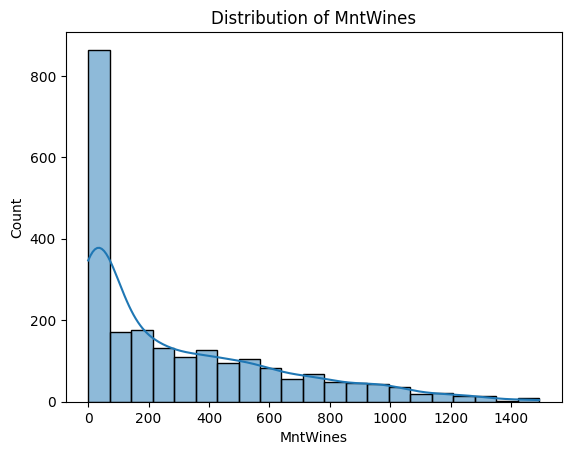

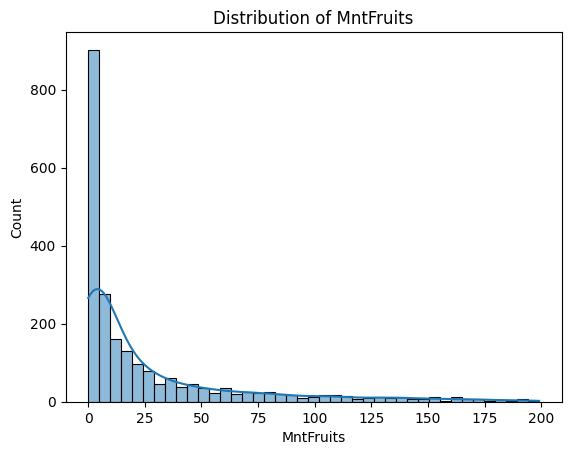

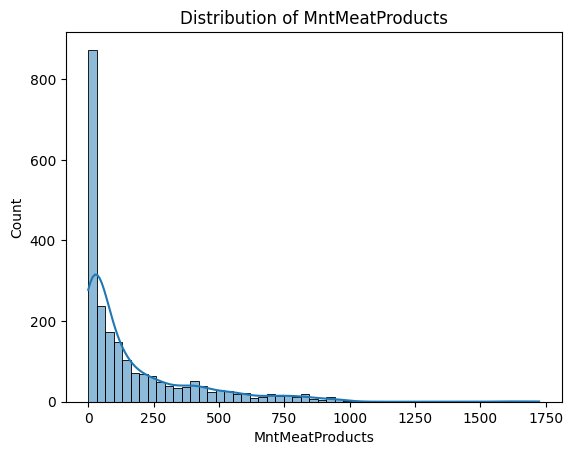

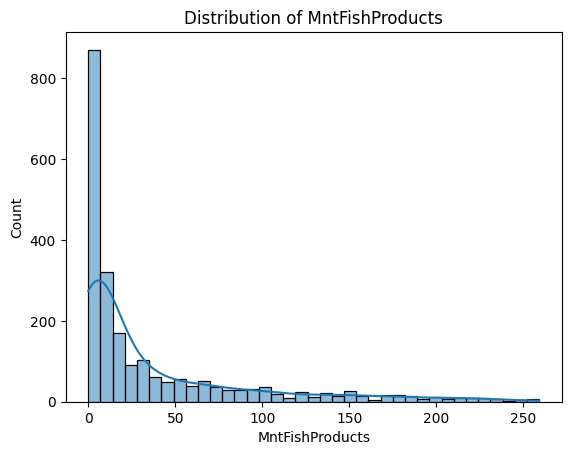

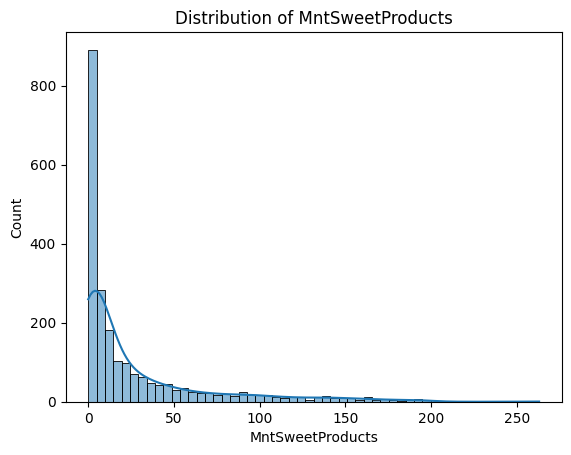

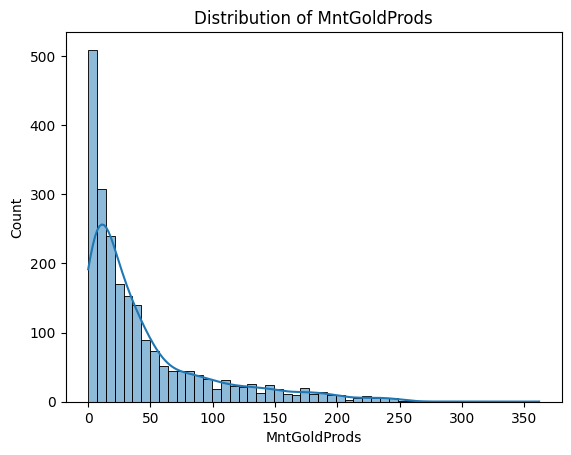

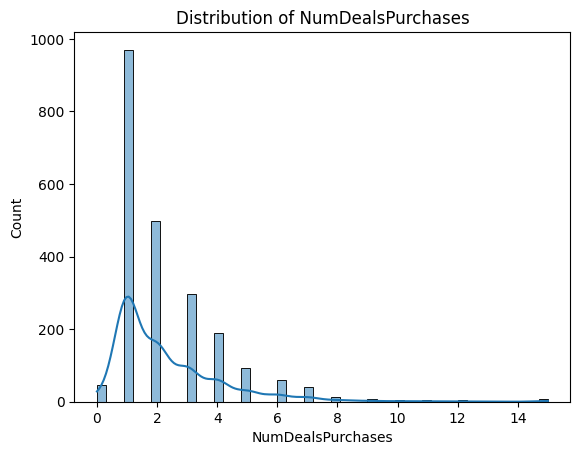

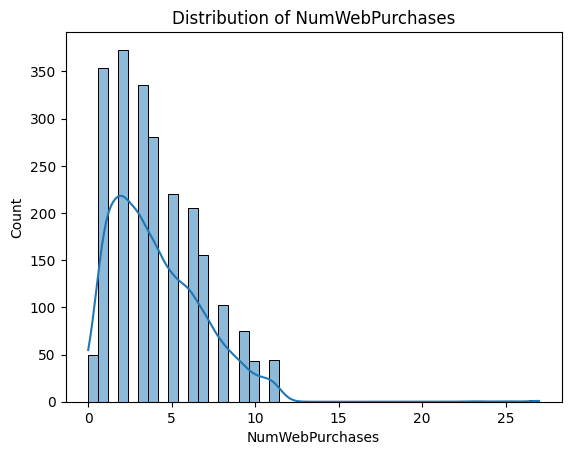

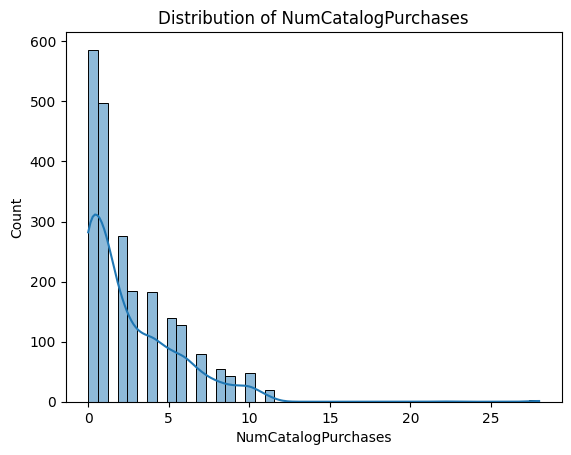

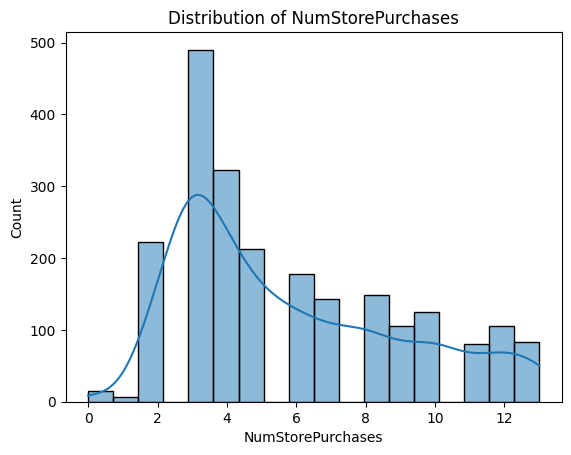

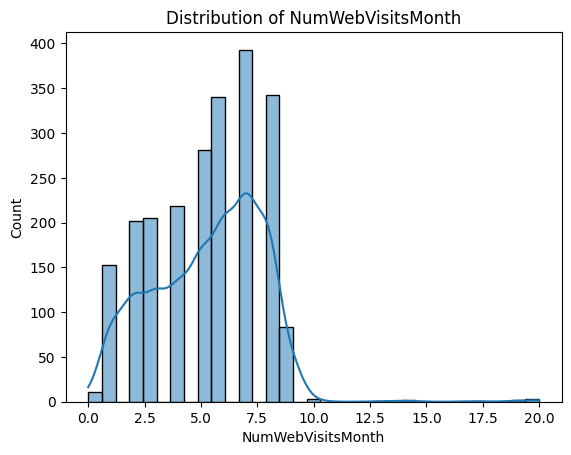

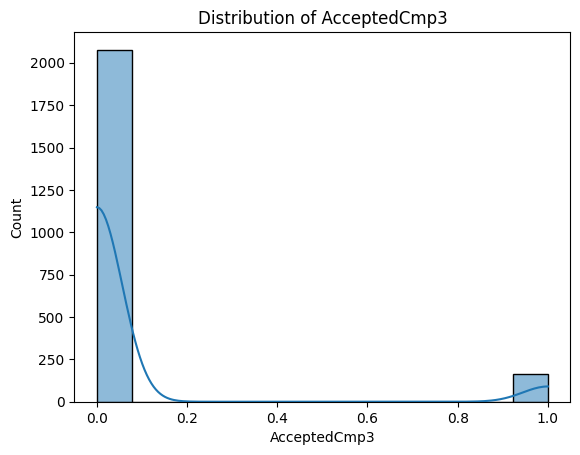

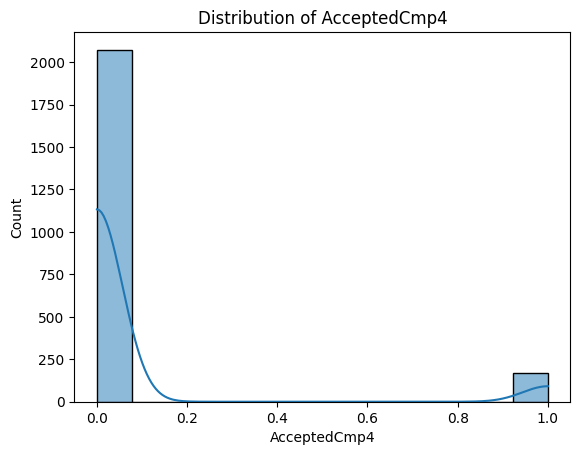

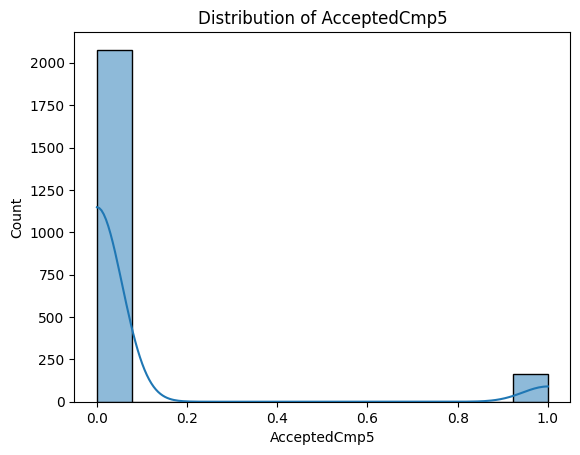

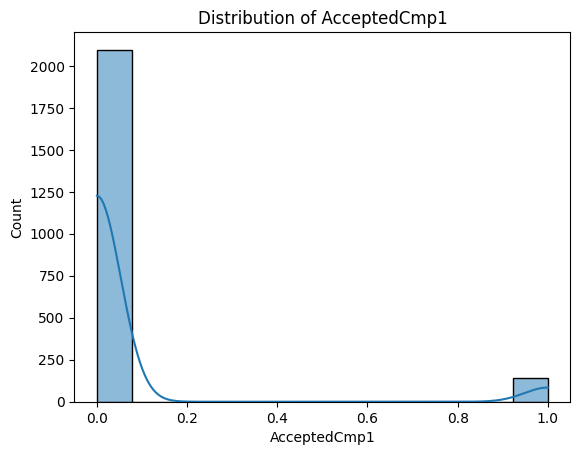

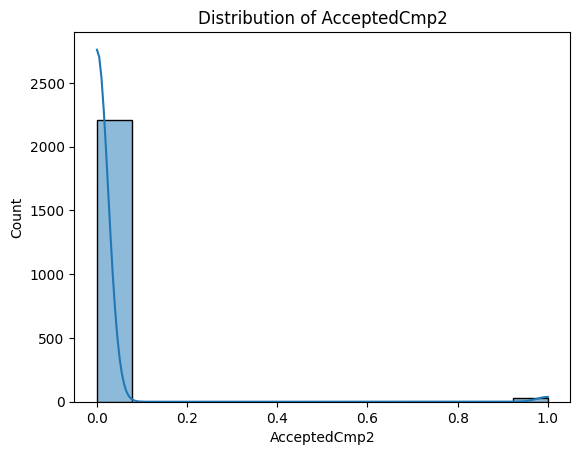

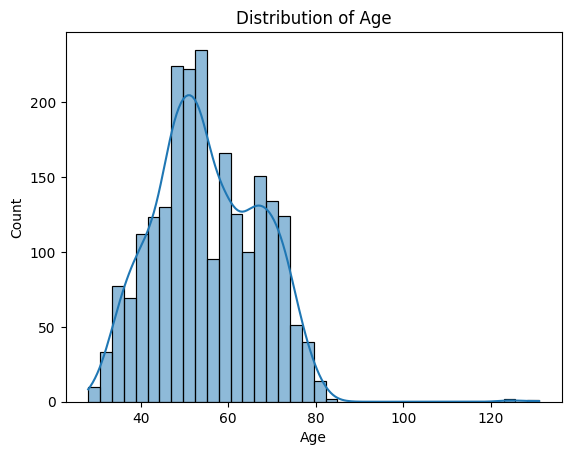

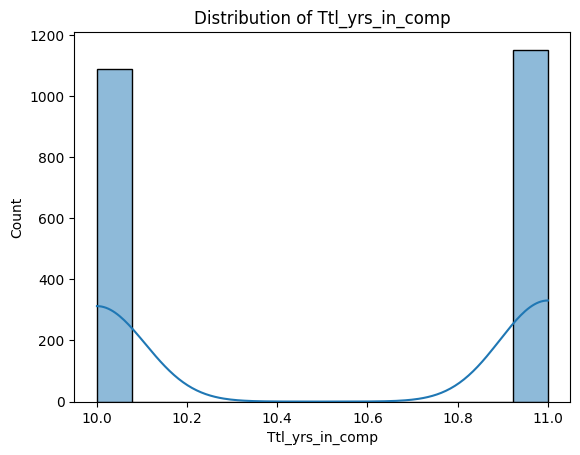

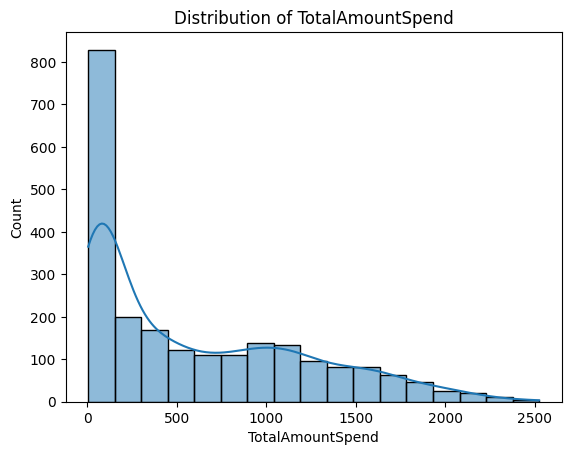

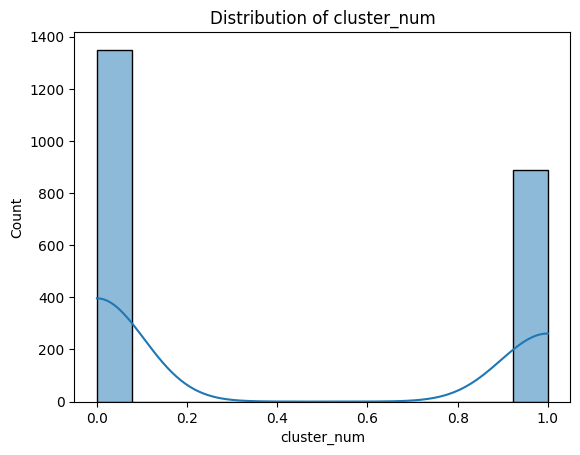

In [15]:
for column in df.columns:
    plt.figure()
    sns.histplot(df[column], kde=True)  # seaborn.distplot is deprecated
    plt.title(f'Distribution of {column}')
    plt.show()


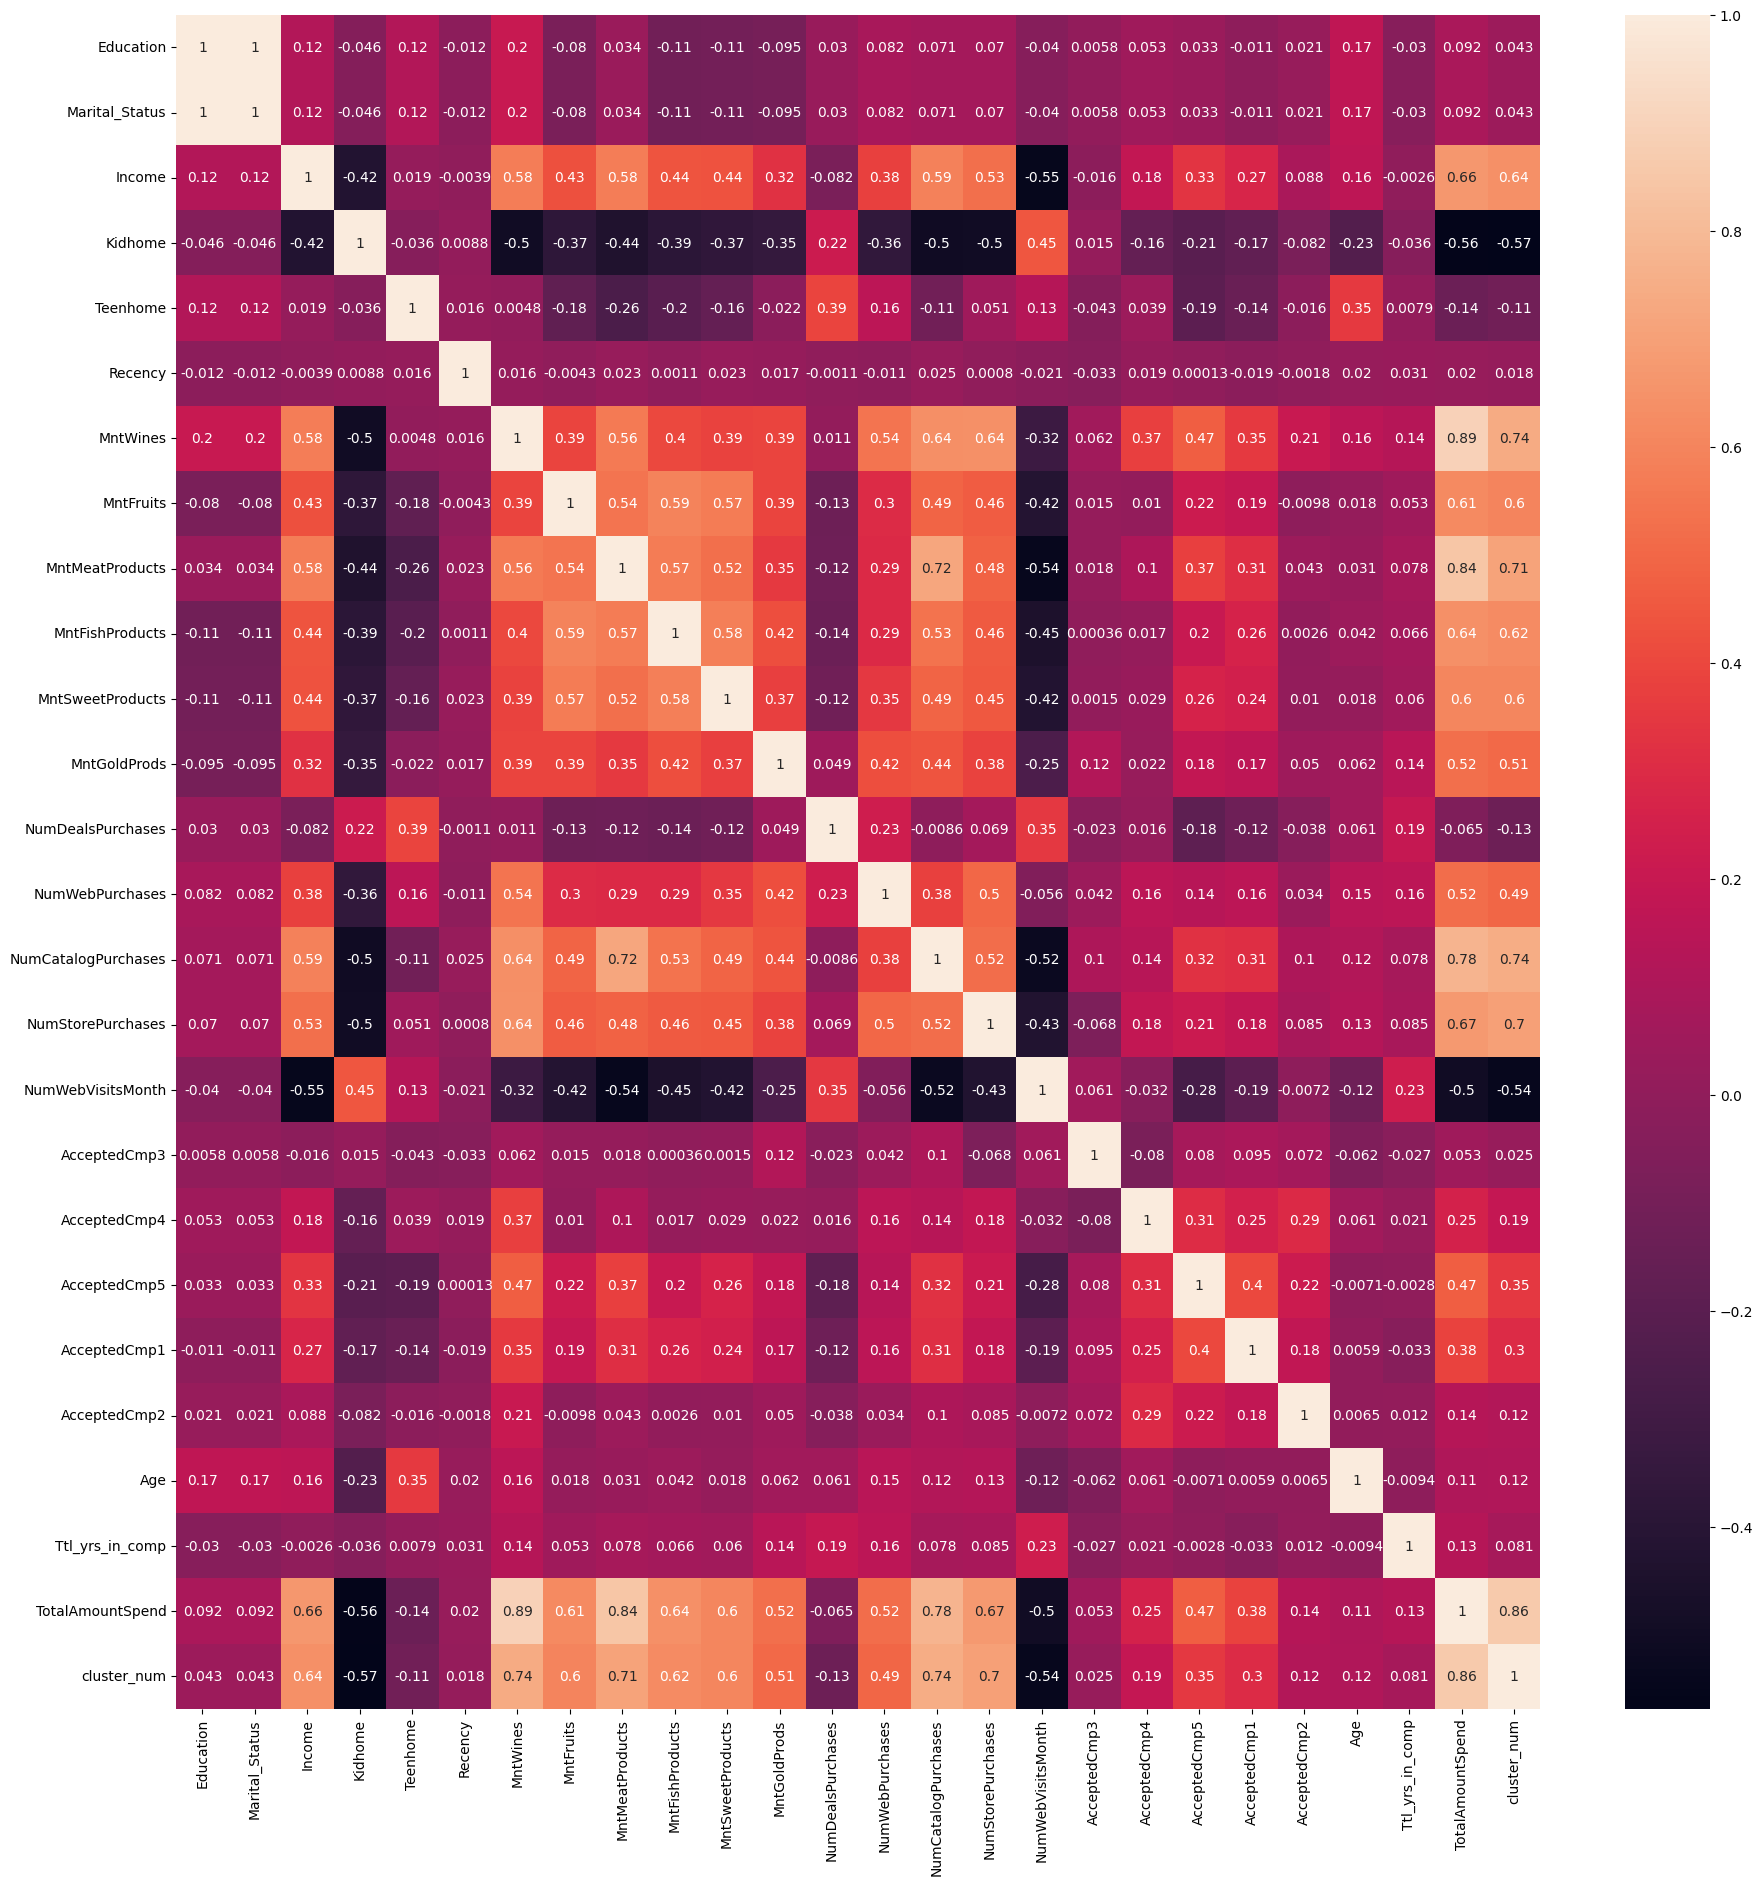

In [17]:
plt.figure(figsize=(22,22))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Scalling the dataFrame

In [16]:
scaler=StandardScaler()
scaled_df= scaler.fit_transform(df)

In [17]:
scaled_df

array([[-0.35014129, -0.35014129,  0.23506136, ...,  0.97182532,
         1.67941681,  1.23160624],
       [-0.35014129, -0.35014129, -0.2360674 , ..., -1.02899151,
        -0.96127545, -0.81194782],
       [-0.35014129, -0.35014129,  0.77334016, ..., -1.02899151,
         0.28267329,  1.23160624],
       ...,
       [-0.35014129, -0.35014129,  0.18884329, ..., -1.02899151,
         1.05495122,  1.23160624],
       [ 0.53910643,  0.53910643,  0.6787469 , ..., -1.02899151,
         0.39394775,  1.23160624],
       [ 1.42835415,  1.42835415,  0.02458337, ...,  0.97182532,
        -0.7204576 , -0.81194782]])

# clustering with income and total amount speend data

In [18]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Age',
       'Ttl_yrs_in_comp', 'TotalAmountSpend', 'cluster_num'],
      dtype='object')

In [20]:
X = df[['Income', 'TotalAmountSpend']].values

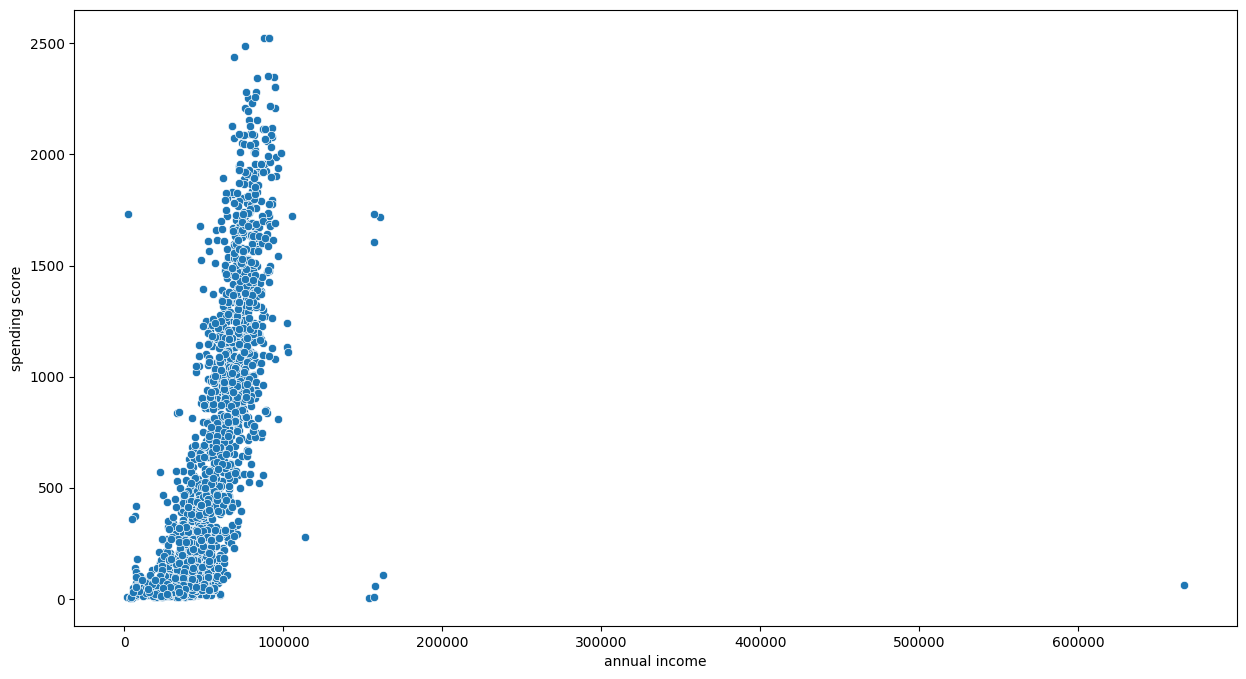

In [22]:


plt.figure(figsize=(15, 8))
sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

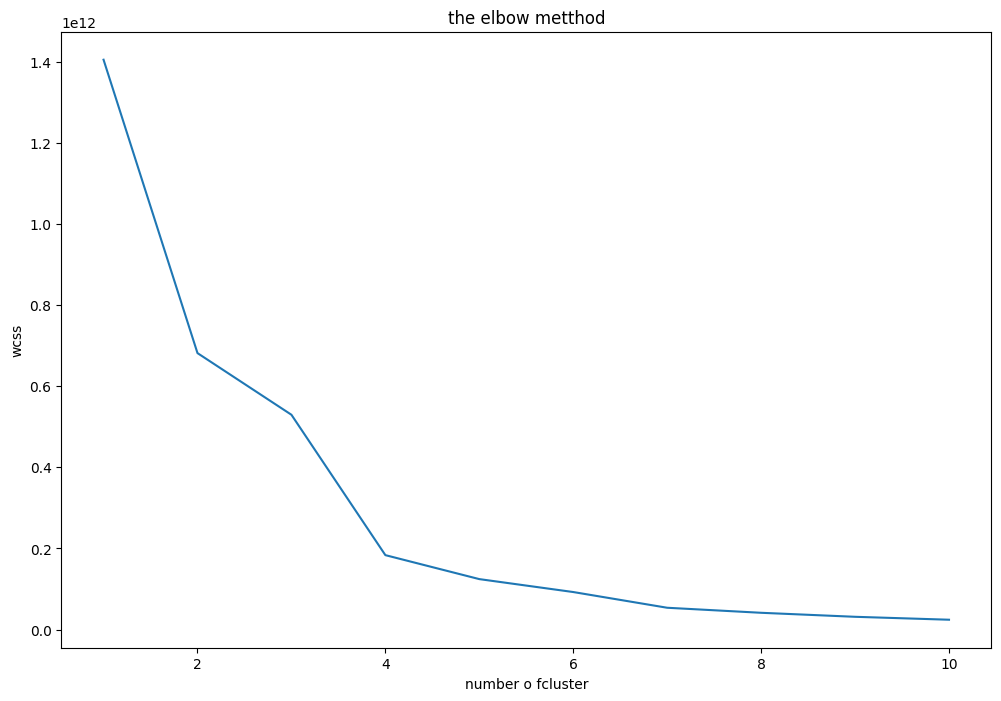

In [23]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=2)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,8))
plt.plot(range(1,11), wcss)
plt.title('the elbow metthod')
plt.xlabel('number o fcluster')
plt.ylabel('wcss')
plt.show

In [24]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
Y = kmeans.fit_predict(X)

In [27]:
kmeans.cluster_centers_

array([[2.89749962e+04, 9.95564103e+01],
       [7.80586178e+04, 1.32402707e+03],
       [6.66666000e+05, 6.20000000e+01],
       [5.38629024e+04, 5.38848375e+02]])

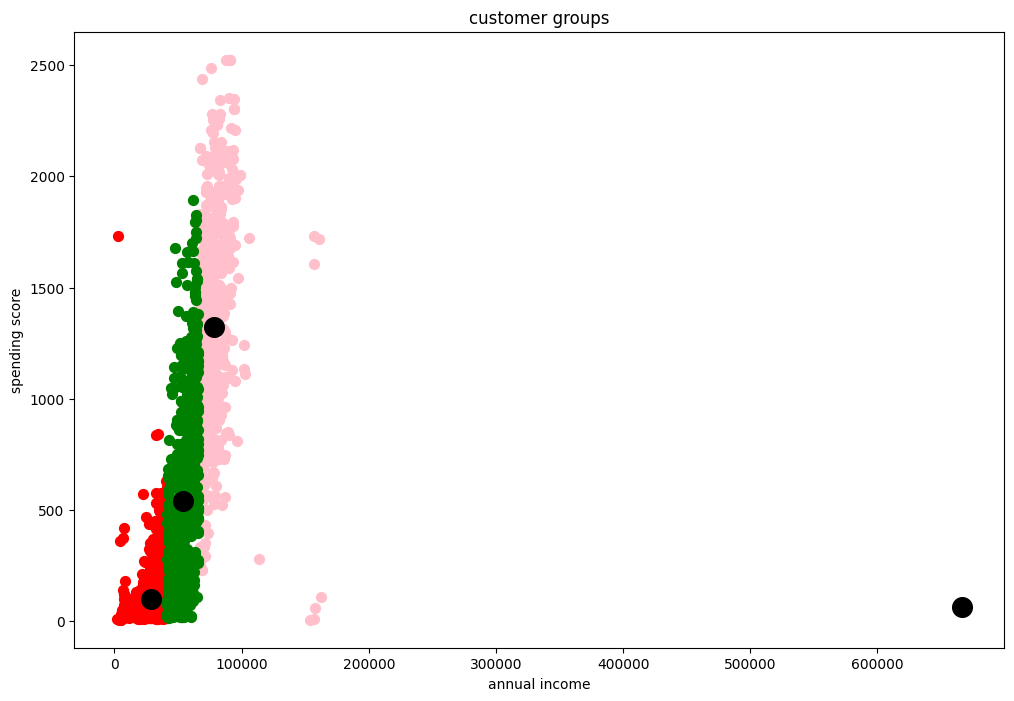

In [29]:
plt.figure(figsize=(12,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='red', label='cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='pink', label='cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='green', label='cluster 4')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='black', label='clusters')
plt.title('customer groups')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.show()

## plotting 3 clusters

In [30]:
from sklearn.cluster import KMeans
clusters = KMeans(3,random_state=0)
clusters.fit(X_scaled)

KMeans(n_clusters=4, random_state=0)

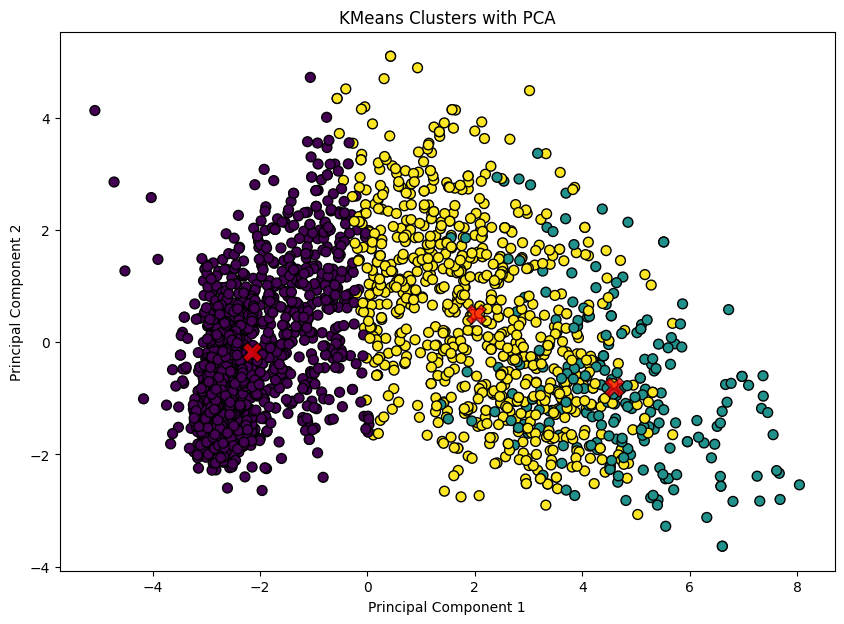

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming X_scaled is already defined and scaled
# Define the number of clusters
k = 3

# Create and fit the model
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Get cluster labels
labels = kmeans.labels_

# Use PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 7))

# Scatter plot of the two principal components
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)

# Mark the cluster centers
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, alpha=0.75, edgecolor='k')

# Add titles and labels
plt.title('KMeans Clusters with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show the plot
plt.show()


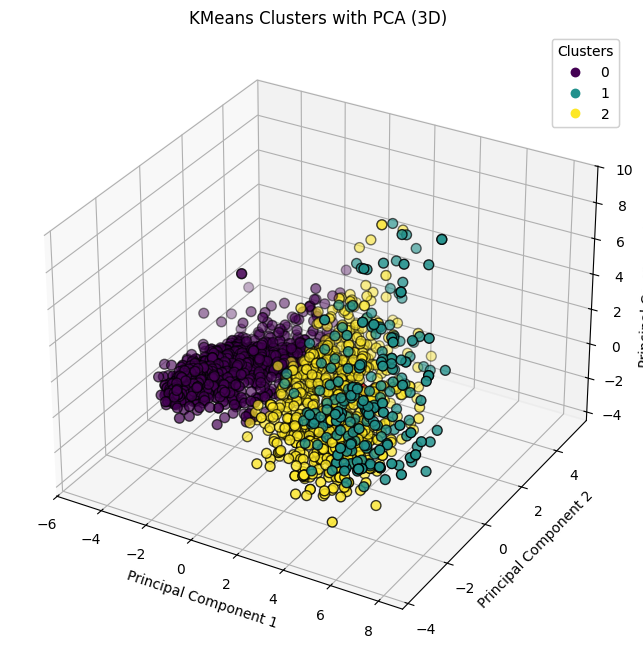

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define the number of clusters
k = 3

# Create and fit the model
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Get cluster labels
labels = kmeans.labels_

# Use PCA to reduce dimensions to 3D
pca = PCA(n_components=3)
principal_components = pca.fit_transform(X_scaled)

# Plot the clusters in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the three principal components
scatter = ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)

# Mark the cluster centers
centers = pca.transform(kmeans.cluster_centers_)
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', marker='X', s=200, alpha=0.75, edgecolor='k')

# Add titles and labels
ax.set_title('KMeans Clusters with PCA (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Add legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# Show the plot
plt.show()


In [36]:
inertia = kmeans.inertia_
print(f'Inertia: {inertia}')


Inertia: 37671.57183454448


In [37]:
unique, counts = np.unique(labels, return_counts=True)
cluster_sizes = dict(zip(unique, counts))
print(f'Cluster Sizes: {cluster_sizes}')


Cluster Sizes: {np.int32(0): np.int64(1227), np.int32(1): np.int64(230), np.int32(2): np.int64(783)}


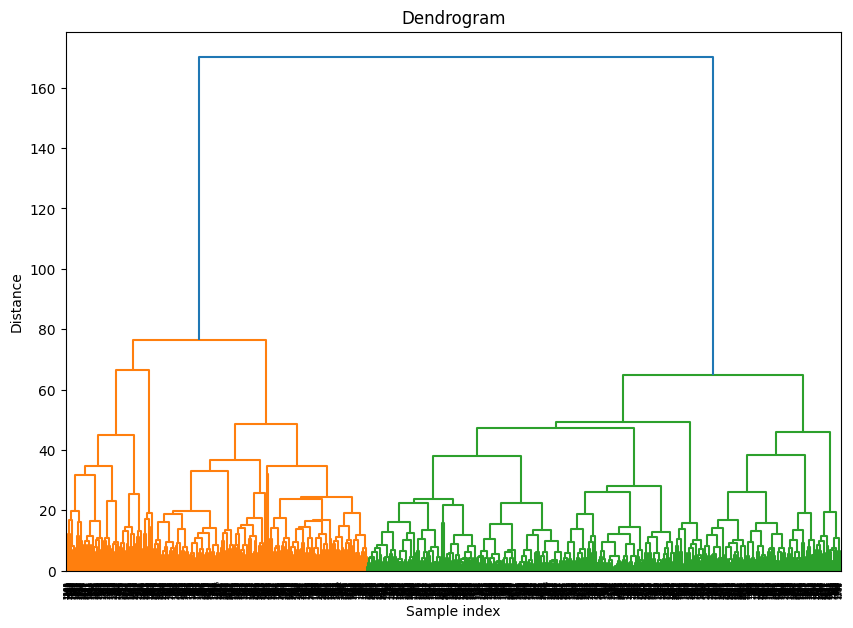

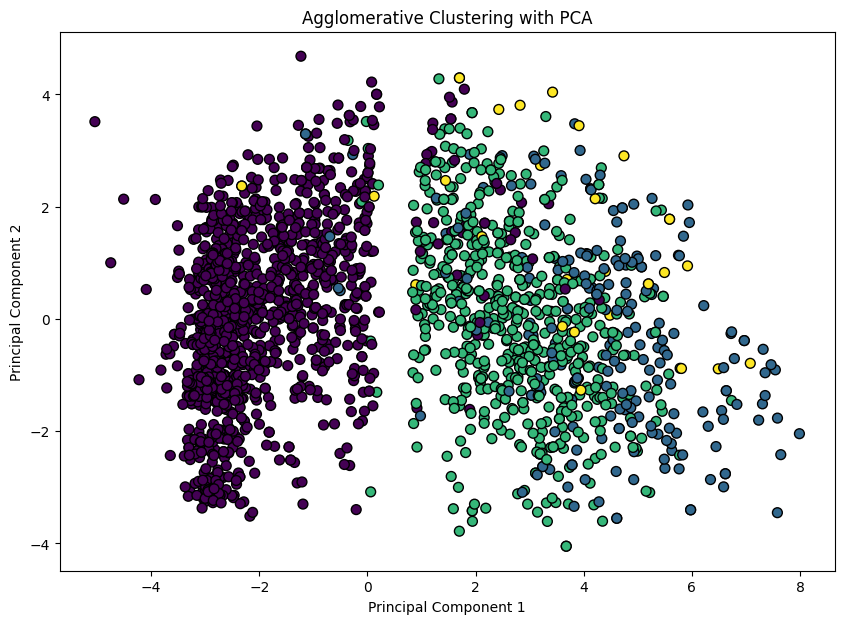

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Perform hierarchical clustering using the ward linkage method
linked = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Fit the Agglomerative Clustering model
n_clusters = 4  # Choose the number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
labels = agg_clustering.fit_predict(X_scaled)

# Use PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 7))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Agglomerative Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



In [45]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_scaled, labels)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.25847607884155926


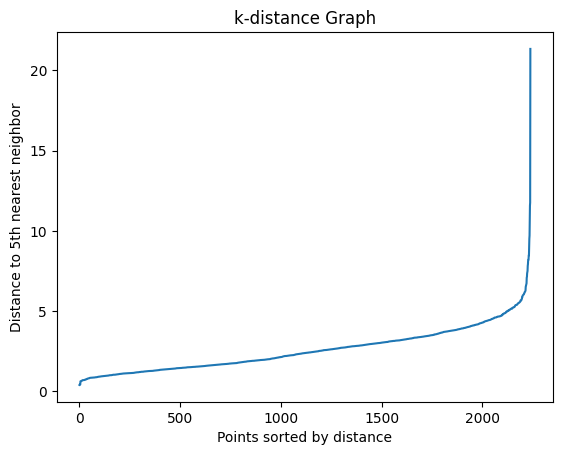

In [46]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:,4], axis=0)
plt.plot(distances)
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to 5th nearest neighbor')
plt.title('k-distance Graph')
plt.show()

